In [3]:
import os

In [4]:
os.getcwd()

'/Users/shiva/Documents/UMD/Classes/ECE-5831 Nueral Networks/Assignment67'

In [5]:
os.chdir('/Users/shiva/Documents/UMD/Classes/ECE-5831 Nueral Networks/Assignment67')

In [6]:
import numpy as np
from two_layer_net import TwoLayerNet
from mnist import Mnist
from tqdm import tqdm
import gradients
import losses
import activations

In [7]:
mnist = Mnist()
(x_train, t_train), (x_test, t_test) = mnist.load_data(normalize=True, one_hot_label=True)

### Testing if mnist dataset successfully loaded

In [8]:
import matplotlib.pyplot as plt

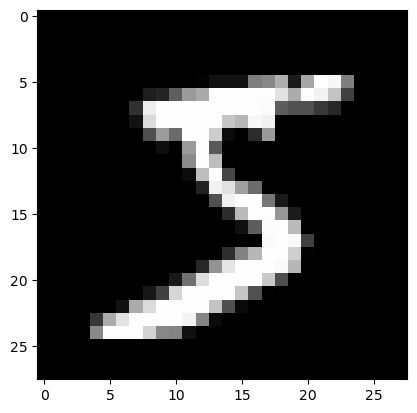

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.show()
print(t_train[0])

### Let's start training your TwoLayerNet

In [10]:
x_train.shape

(60000, 784)

hyperparams

In [11]:
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 50
learning_rate = 0.1

In [12]:
#see batch mask
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)

[27679 23876  6514  3583 39955  8433 20361 46748 42385 32340 50769 36418
 46266 21965 12762 34333 46072  1707 49287 35331 41606 34772 46389 34417
 14747 10898 54178 24653 47165 17208 52155 17928 23802 13417 59598 25147
 40541 50581 50259 32285 25196 12101 25498 33274 21455 57270 51732 14335
  5606  4062]


In [13]:
net = TwoLayerNet(input_size=28*28, hidden_size=1000, output_size=10)

In [14]:
train_losses = []
for _ in tqdm(range(iters_num)):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    grad = net.gradient(x_batch, t_batch)
    for key in ('w1', 'b1', 'w2', 'b2'):
        net.params[key] -= learning_rate*grad[key]
    loss = net.loss(x_batch, t_batch)
    train_losses.append(loss)

100%|██████████| 10000/10000 [02:38<00:00, 63.10it/s]


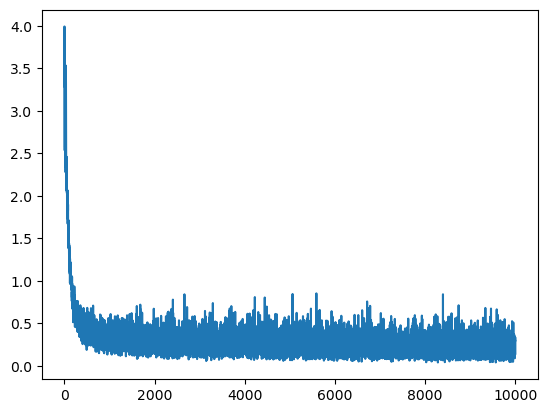

In [15]:
plt.figure()
plt.plot(train_losses)
plt.show()

### Let's test our neural network on handwritten digits

#### Using the code from test.py

In [4]:
import sys
import cv2
import glob

#const definition
mnist_pkl_filename = 'bendale_mnist_nn_model.pkl'

rows = 9
columns = 8
figure = plt.figure(figsize=(20,20))

file_name = list(glob.glob('test_images_1/*.png'))
#hyperparameters

iterations = 10000
batch_size = 50
learning_rate = 0.1

hidden_size = 500
for i, name in enumerate(file_name, start=1):
    image = cv2.imread(name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.bitwise_not(image) #Invert the colors
    image = cv2.resize(image,(28,28))

    # Add subplot to the ith position
    figure.add_subplot(rows, columns, i)
    plt.imshow(image, cmap='gray')
    image = image.reshape(784,) # reshape the image to the 784 vector

    mnist = Mnist()
    (x_train, t_train), (x_test, t_test) = mnist.load_data(normalize=True, one_hot_label=True)


    network = TwoLayerNet(input_size = mnist.img_size, hidden_size = hidden_size, output_size = 10)

    network.load_model(mnist_pkl_filename)

    #network.save_model(mnist_pkl_filename)


    y = TwoLayerNet.predict(network, image)
    predicted_num = int(np.argmax(y))

    figure.tight_layout()
    plt.title('predicted={}'.format(predicted_num))#The title for each image shows what the model has predicted for that digit image

ImportError: dlopen(/Users/shiva/miniforge3/envs/ece-5831/lib/python3.8/site-packages/cv2.cpython-38-darwin.so, 0x0002): Library not loaded: @rpath/libcrypto.3.dylib
  Referenced from: <BD249E89-BD59-367A-A6F2-E2316CB02E46> /Users/shiva/miniforge3/envs/ece-5831/lib/libhdf5.200.dylib
  Reason: tried: '/Users/shiva/miniforge3/envs/ece-5831/lib/libcrypto.3.dylib' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/Users/shiva/miniforge3/envs/ece-5831/lib/libcrypto.3.dylib' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/Users/shiva/miniforge3/envs/ece-5831/lib/python3.8/site-packages/../../libcrypto.3.dylib' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/Users/shiva/miniforge3/envs/ece-5831/lib/python3.8/site-packages/../../libcrypto.3.dylib' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/Users/shiva/miniforge3/envs/ece-5831/bin/../lib/libcrypto.3.dylib' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/Users/shiva/miniforge3/envs/ece-5831/bin/../lib/libcrypto.3.dylib' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS@rpath/libcrypto.3.dylib' (no such file), '/Users/shiva/miniforge3/envs/ece-5831/lib/libcrypto.3.dylib' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/Users/shiva/miniforge3/envs/ece-5831/lib/libcrypto.3.dylib' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/Users/shiva/miniforge3/envs/ece-5831/lib/python3.8/site-packages/../../libcrypto.3.dylib' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/Users/shiva/miniforge3/envs/ece-5831/lib/python3.8/site-packages/../../libcrypto.3.dylib' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/Users/shiva/miniforge3/envs/ece-5831/bin/../lib/libcrypto.3.dylib' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/Users/shiva/miniforge3/envs/ece-5831/bin/../lib/libcrypto.3.dylib' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/usr/local/lib/libcrypto.3.dylib' (no such file), '/usr/lib/libcrypto.3.dylib' (no such file, not in dyld cache)